In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:
def linear_regression_forecast(df, train_size_ratio=0.7):
    # Xử lý dữ liệu
    df = df.dropna()  # Drop missing values
    df = df.reset_index(drop=True)  # Reset the index

    # Chuyển giá từ chuỗi sang số
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Chỉ giữ lại cột Price
    df = df[['Price']]

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    df.sort_index(inplace=True)

    # Chia dữ liệu cho pha test và pha train
    train_size = int(train_size_ratio * len(df))
    test_size = len(df) - train_size

    train_data = df[:train_size]
    test_data = df[train_size:train_size + test_size]

    # Training
    x_train = np.array((train_data.index - train_data.index[0]).days).reshape(-1, 1)
    y_train = np.array(train_data['Price'])

    # Train the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Testing
    x_test = np.array((test_data.index - train_data.index[0]).days).reshape(-1, 1)
    y_test = np.array(test_data['Price'])
    y_pred = model.predict(x_test)

    # Hàm tính MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Tính MSE
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    # Tính MAE
    test_mae = np.mean(np.abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

    # Tính toán MAPE
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    print('Testing MAPE:', test_mape)

    # Dự đoán 30 ngày sau test
    future_days_30 = 30
    future_index_30 = pd.date_range(start=test_data.index[-1], periods=future_days_30 + 1, freq='B')[1:]
    x_future_30 = np.array((future_index_30 - train_data.index[0]).days).reshape(-1, 1)
    y_future_30 = model.predict(x_future_30)

    # Dự đoán 60 ngày sau test
    future_days_60 = 60
    future_index_60 = pd.date_range(start=test_data.index[-1], periods=future_days_60 + 1, freq='B')[1:]
    x_future_60 = np.array((future_index_60 - train_data.index[0]).days).reshape(-1, 1)
    y_future_60 = model.predict(x_future_60)

    # Dự đoán 90 ngày sau test
    future_days_90 = 90
    future_index_90 = pd.date_range(start=test_data.index[-1], periods=future_days_90 + 1, freq='B')[1:]
    x_future_90 = np.array((future_index_90 - train_data.index[0]).days).reshape(-1, 1)
    y_future_90 = model.predict(x_future_90)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')
    plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')
    plt.plot(test_data.index, y_pred, color='green', label='Predictions on Test Data')

    # Vẽ dự đoán mở rộng với các màu khác nhau
    plt.plot(future_index_90, y_future_90, label='Predictions Days 61-90', color='brown')
    plt.plot(future_index_60, y_future_60, label='Predictions Days 31-60', color='purple')
    plt.plot(future_index_30, y_future_30, label='Predictions Days 1-30', color='red')



    plt.title('Linear Regression Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()




<h1>BID</h1>

Chia dữ liệu pha train:test 6:4

Testing RMSE: 6124.180501794336
Testing MAE: 5263.013427801333
Testing MAPE: 14.952613554914665


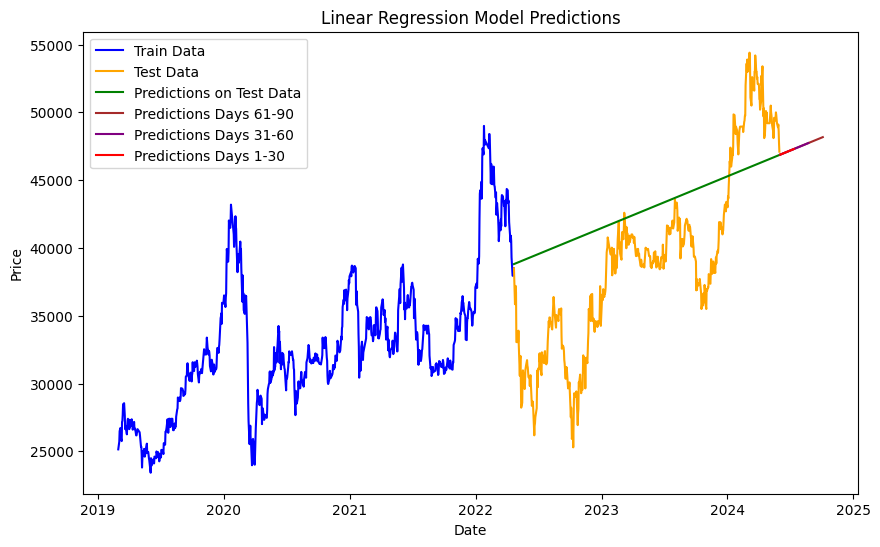

In [3]:
df = pd.read_csv('../data/BID.csv')
linear_regression_forecast(df, train_size_ratio=0.6)

Chia dữ liệu pha train:test theo tỉ lệ 7:3

Testing RMSE: 5966.906506967226
Testing MAE: 4494.303189209272
Testing MAPE: 10.066239774267384


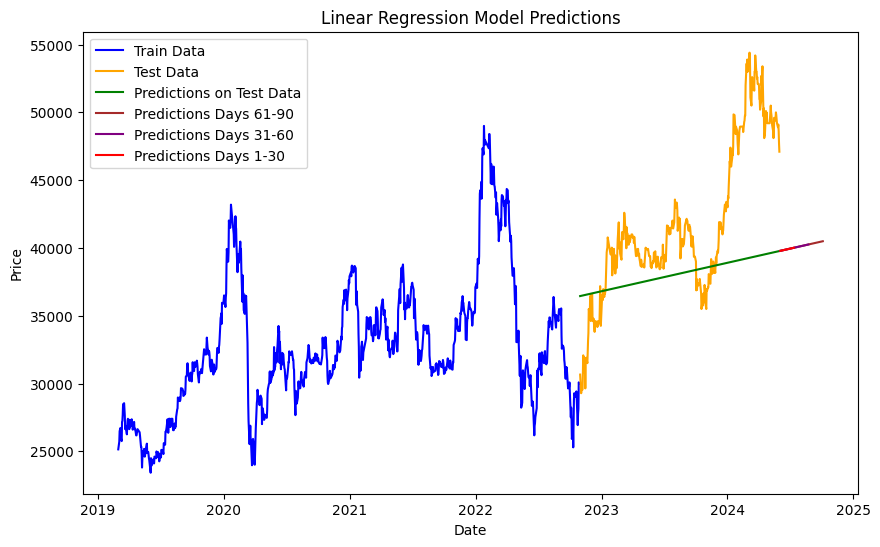

In [4]:
df = pd.read_csv('../data/BID.csv')
linear_regression_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train:test theo tỉ lệ 8:2

Testing RMSE: 6673.10661745974
Testing MAE: 5093.522745276587
Testing MAPE: 10.734803137116163


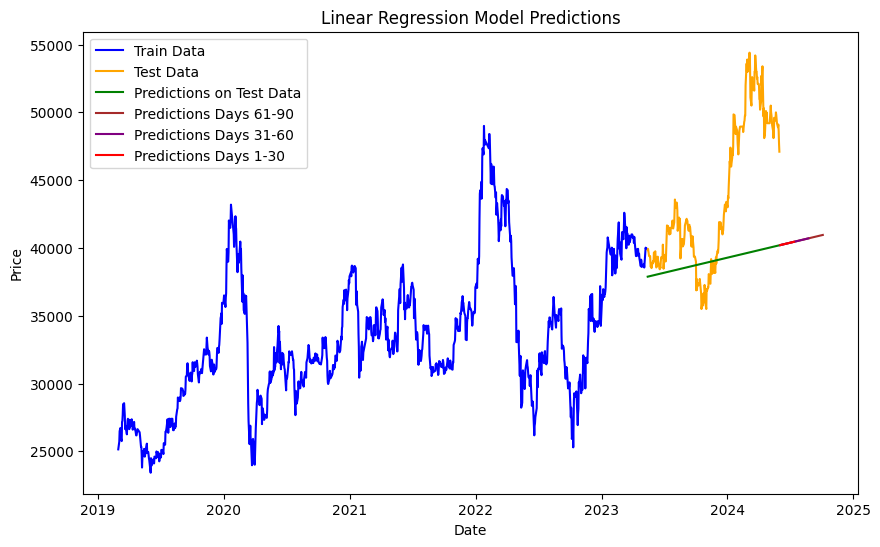

In [5]:
df = pd.read_csv('../data/BID.csv')
linear_regression_forecast(df, train_size_ratio=0.8)

<h1>STB</h1>

Chia dữ liệu pha train:test theo tỉ lệ 6:4

Testing RMSE: 13838.536925476814
Testing MAE: 13411.733064893077
Testing MAPE: 53.50610576105378


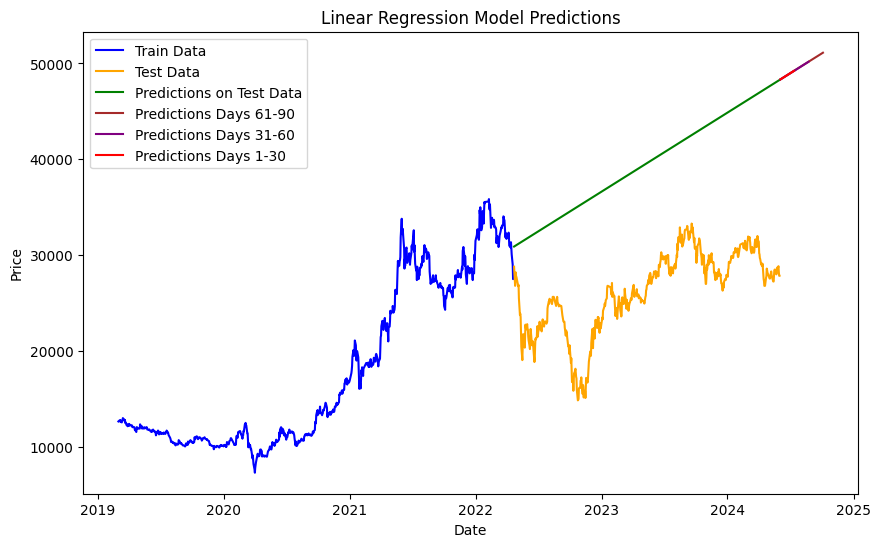

In [6]:
df = pd.read_csv('../data/STB.csv')
linear_regression_forecast(df, train_size_ratio=0.6)

Chia dữ liệu pha train:test theo tỉ lệ 7:3

Testing RMSE: 7300.626492258124
Testing MAE: 6820.893162266266
Testing MAPE: 26.595730152289317


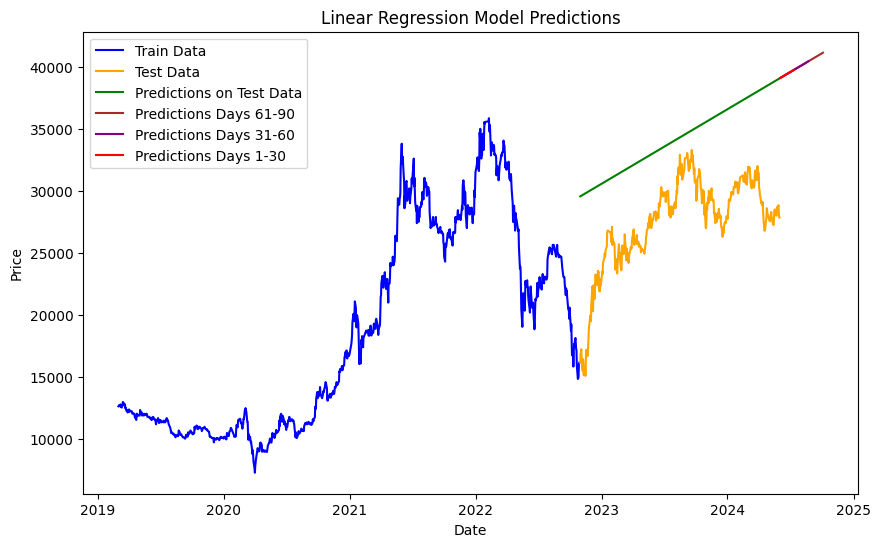

In [7]:
df = pd.read_csv('../data/STB.csv')
linear_regression_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train:test theo tỉ lệ 8:2

Testing RMSE: 3157.6506531481564
Testing MAE: 2603.795630568332
Testing MAPE: 9.047280488929573


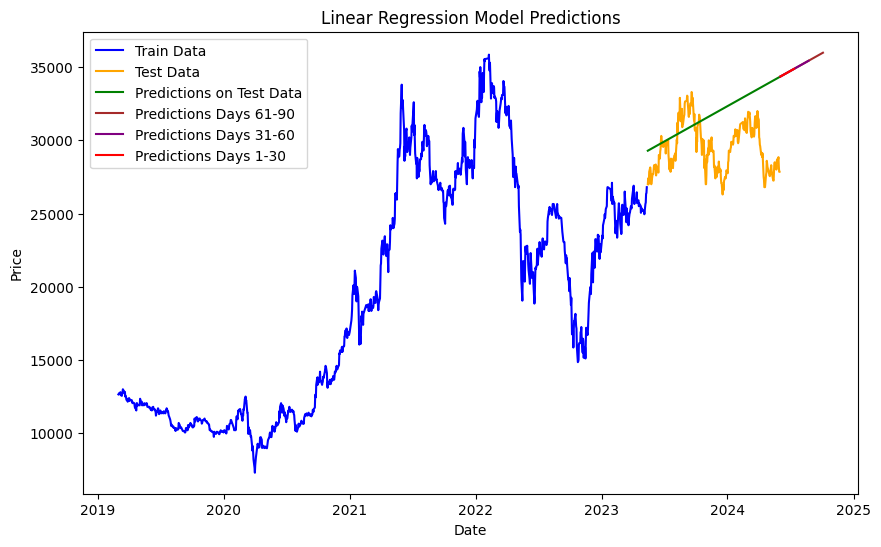

In [8]:
df = pd.read_csv('../data/STB.csv')
linear_regression_forecast(df, train_size_ratio=0.8)

<h1>VIB</h1>

Chia dữ liệu pha train:test theo tỉ lệ 6:4

Testing RMSE: 23457.61087765734
Testing MAE: 22306.551946847634
Testing MAPE: 108.12365424596557


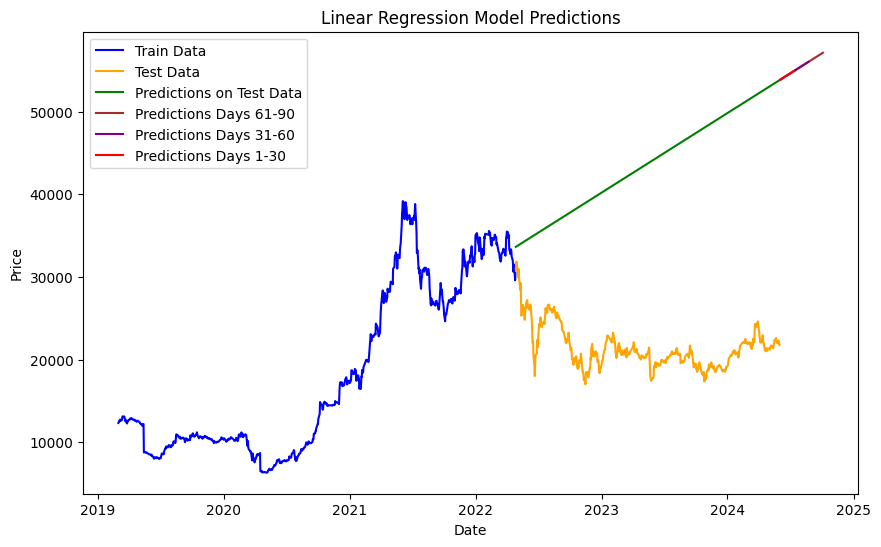

In [9]:
df = pd.read_csv('../data/VIB.csv')
linear_regression_forecast(df, train_size_ratio=0.6)    

Chia dữ liệu pha train:test theo tỉ lệ 7:3

Testing RMSE: 17853.452723657563
Testing MAE: 17571.395892331155
Testing MAPE: 86.58402296430702


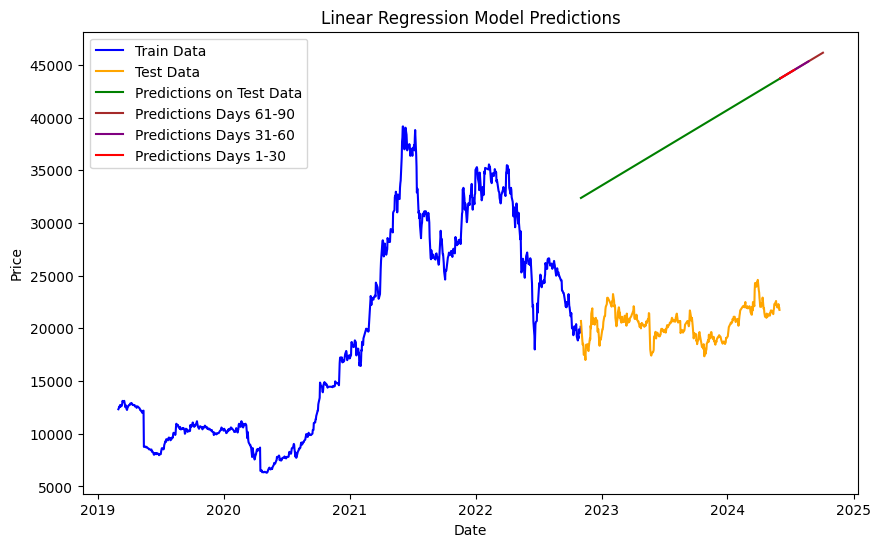

In [10]:
df = pd.read_csv('../data/VIB.csv')
linear_regression_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train:test theo tỉ lệ 8:2

Testing RMSE: 12271.075366709647
Testing MAE: 12196.670222963545
Testing MAPE: 60.35942570603906


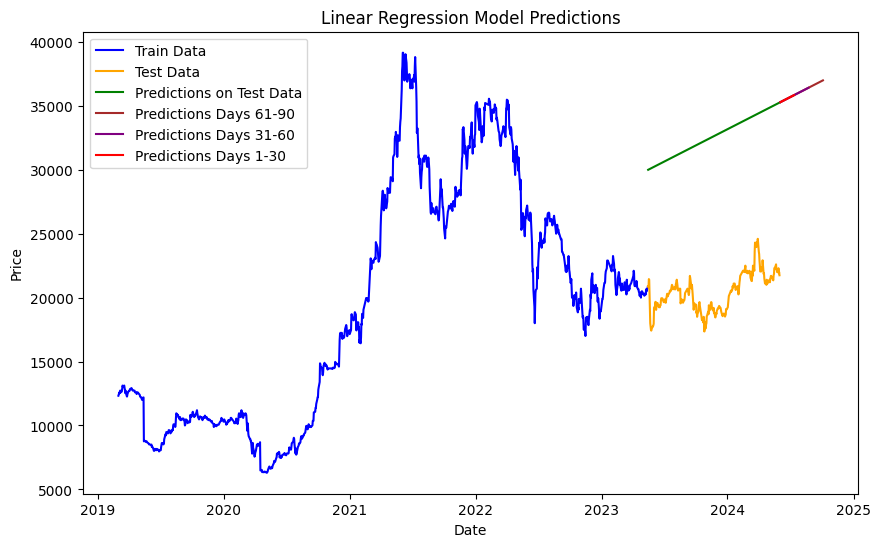

In [11]:
df = pd.read_csv('../data/VIB.csv')
linear_regression_forecast(df, train_size_ratio=0.8)    